In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [6]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(mean) 

In [18]:
mean=df.Age.mean()
mean

29.69911764705882

In [19]:
impute_nan(df,'Age',mean)
df.head(20)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.000000
1,1,38.0,71.2833,38.000000
2,1,26.0,7.9250,26.000000
3,1,35.0,53.1000,35.000000
4,0,35.0,8.0500,35.000000
5,0,NaN,8.4583,29.699118
6,0,54.0,51.8625,54.000000
7,0,2.0,21.0750,2.000000
8,1,27.0,11.1333,27.000000
9,1,14.0,30.0708,14.000000


In [20]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.002015226002884


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

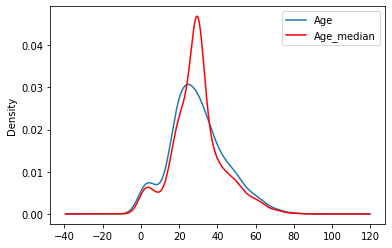

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')